# Analiza szeregów czasowych

Ten notatnik pomoże Ci zapoznać się ze specyfiką analizy szerów czasowych. W trakcie ćwiczenia będziemy korzystać ze standardowych bibliotek takich jak [pandas](https://pandas.pydata.org/) jak również ze specjalizowanej biblioteki [pmdarima](http://alkaline-ml.com/pmdarima/). Po uzupełnieniu tego notatnika powinieneś:

+ wiedzieć jak szybko wizualizować szeregi czasowe,
+ jak w pandas przetwarzać szeregi czasowe do prognozowania,
+ jak szybko stworzyć model typu ARIMA,
+ jak przystosować szereg czasowy do algorytmów uczenia maszynowego.

## Przygotowanie

pmdarima to biblioteka do analizy i prognozowania szeregów czasowych w Pythonie. Jej zaletami jest szereg wbudowanych testów statystycznych i opcja automatycznego doboru parametrów modeli typu ARIMA. Aby móc korzystać z biblioteki pmdarima, należy ją zainstalować w następujący sposób:

```
pip install pmdarima
```

Wykonaj poniższy kod, aby sprawdzić czy biblioteka została poprawnie zainstalowana.

In [1]:
from pmdarima import datasets
from pmdarima import utils
from pmdarima import preprocessing
from pmdarima import arima
from pmdarima import auto_arima

Jeśli wszystko działa, możemy załadować zbiór danych do ćwiczeń. Skorzystamy z klasycznego zbioru Boxa i Jenkinsa. Dane dotyczą miesięcznej liczby lotów międzynarodowych w latach 1949-1960.

In [3]:
y = datasets.load_airpassengers(True) # True sprawia że dostaniemy pandas Series a nie numpy array

**Zad. 1: Wyświetl pierwsze 10 wierszy zbioru.**

In [4]:
y.head(10)

0    112.0
1    118.0
2    132.0
3    129.0
4    121.0
5    135.0
6    148.0
7    148.0
8    136.0
9    119.0
dtype: float64

## Wizualizacje i dekompozycja na składowe

Zanim przystąpimy do progonoznowania naszego szeregu czasowego, zapoznajmy się z nim bliżej.

**Zad. 2: Stwórz wykres liniowy szeregu czasowego. Czy wiedziałeś, że pandas oferuje szereg [wizualizacji](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)? Czy wiedziałeś, że czasami warto dodać średnik na końcu polecenia w notebooku?**

<Axes: >

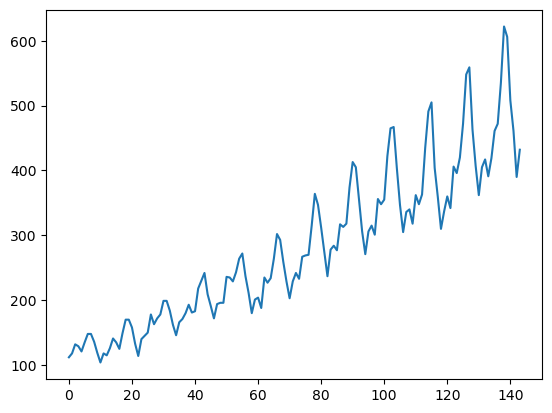

In [5]:
y.plot()

Wydaje się, że szereg czasowy wykazuje trend i sezonowość lub przynajmniej cykliczność. Zobaczmy co jeszcze możemy zwizualizować.

**Zad. 3: Skorzystaj z pmdarima i funkcji w module utils o nazwie `tsdisplay`, żeby zobaczyć wykres szeregu, jego autokorelacji oraz rozkładu wartości. Możesz też skorzystać z funkcji `autocorr_plot`, żeby zobaczyć przedziały istotności autokorelacji. W obu przypadkach, ustaw parametr `show=True`. Co możesz wywnioskować z tych wszystkich wykresów?**

C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


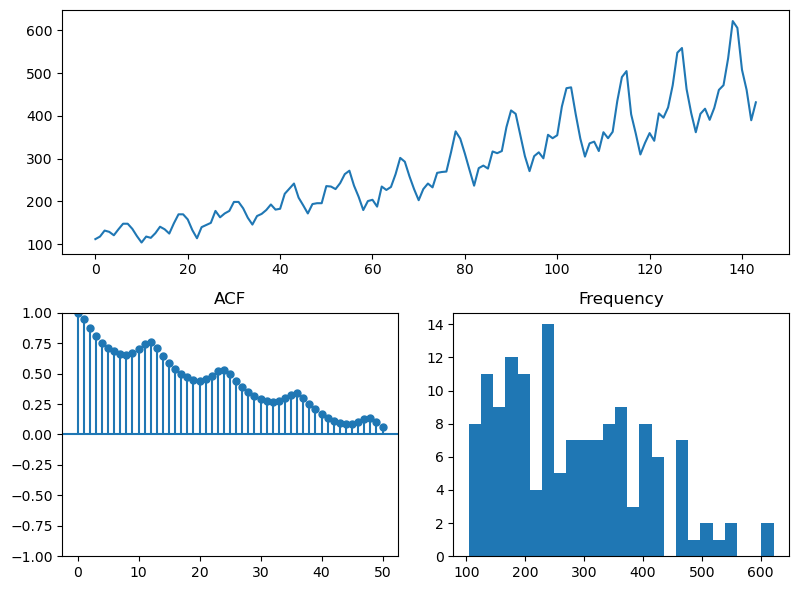

In [8]:
utils.tsdisplay(y, show=True)

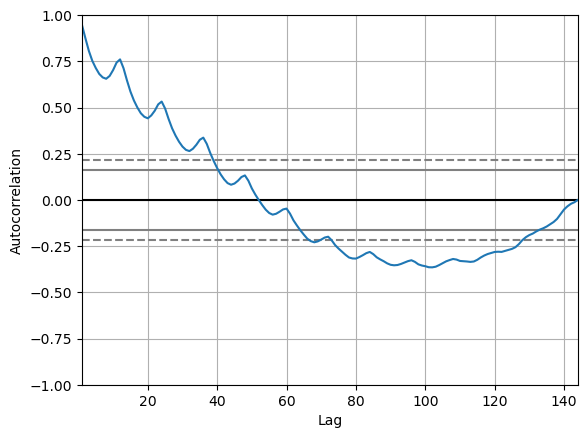

In [10]:
utils.autocorr_plot(y, show=True)

**Zad. 4: Użyj funkcji `arima.decompose` ([API](http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.decompose.html#pmdarima.arima.decompose)), aby dokonać dekompozycji szeregu czasowego. Określ czy ma to być rozkład addytywny czy mulitplikatywny. Uwaga, zamień Series na numpy array podając szereg jako parametr decompose. Wynik przypisz do zmiennej `decomposed`. Następnie zwizualizuj wynik dekompozycji za pomocą `utils.decomposed_plot`.**

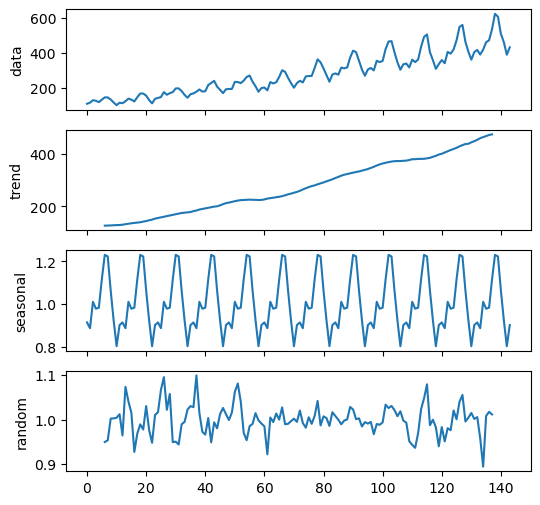

In [13]:
import numpy as np

figure_kwargs = {'figsize': (6, 6)} # to będzie trzeba podać jako parametr decomposed_plot...
decomposed = arima.decompose(y, type_ = 'multiplicative', m = 12)

utils.decomposed_plot(decomposed, show=True, figure_kwargs = figure_kwargs)

## Prognozowanie

Korzystając z powyższych wizualizacji można wstępnie określić czy model typu ARIMA miałby zastosowanie. Następnie można by określić parametry tego modelu. Biblioteka pmdarima ułatwia to zadanie poprzez funkcję `auto_arima`. Funkcja ta wykonuje zadanie typowe dla uczenia maszynowego jakim jest tzw. hyperparameter tuning.

**Zad. 5: Uruchom poniższy kod, aby podzielić szereg czasowy na zbiór treningowy i testowy oraz uruchomić auto_arimę. Następnie dokonaj predykcji na zbiorze testowym. Oceń predykcje za pomocą miary MAE. Zwizualizuj dane testowe wraz z predykcjami, aby zobaczyć gdzie model popełnia błędy.**

C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=815.480, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.03 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=810.652, Time=0.39 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1060.479, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=809.411, Time=0.12 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=810.773, Time=0.37 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=812.681, Time=0.44 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=808.863, Time=0.16 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=810.515, Time=0.49 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=810.614, Time=0.42 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=812.745, Time=0.52 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=809.391, Time=0.21 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=809.691, Time=0.22 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=809.469, Time=0.18 sec


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

 ARIMA(3,0,1)(0,1,0)[12] intercept   : AIC=811.253, Time=0.25 sec
 ARIMA(2,0,0)(0,1,0)[12]             : AIC=812.241, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,1,0)[12] intercept
Total fit time: 5.104 seconds


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

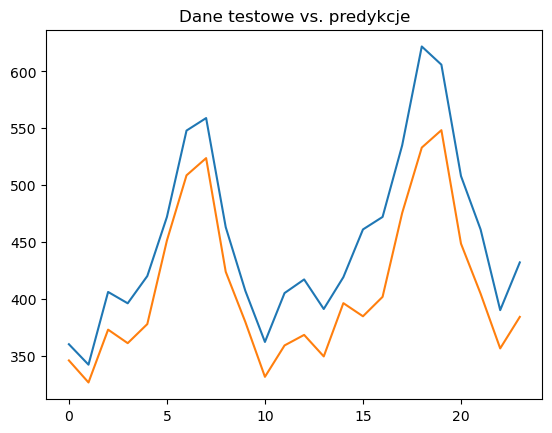

43.46681094453646


In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train, test = train_test_split(y, train_size=120, random_state=23, shuffle=False)
arima_model = auto_arima(train, trace=True, maxiter=10, seasonal=True, m=12)

x = np.arange(test.shape[0])
y_true = test
y_pred = arima_model.predict(n_periods=test.shape[0])
#TODO: pamiętaj, żeby ustawić n_periods na długość zbioru testowego...

plt.plot(x, y_true)
plt.plot(x, y_pred)
plt.title('Dane testowe vs. predykcje')
plt.show()

mae = np.mean(np.abs(y_true - y_pred))
print(mae)
#TODO: policzyć MAE

## Proste modele i uczenie maszynowe

Do tej pory polegaliśmy na bibliotece pmdarima. Niemniej jednak szeregi czasowe można równie dobrze przetwarzać bezpośrednio za pomocą biblioteki pandas i scikit-learn.

Biblioteka pandas posiada dwie funkcje bardzo przydatne przy przetwarzaniu szeregów czasowych: `shift` i `diff`. Funkcja `shift` przesuwa dane w kolumnie, co pozwala łatwo tworzyć nowe kolumny przesunięte w czasie. Z kolei `diff` odejmuje od kolejnych wartości w kolumnie wartości oddalone o zadaną odległość w tej samej kolumnie, co pozwala łatwo stworzyć szereg różnicowy.

Poniżej, cytowana za [machinelearningmastery](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/) (z drobnymi zmianami) metoda, która pozwala łatwo zamienić szereg czasowy na dataframe z wieloma kolumnami. 

In [17]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list or len(data.shape) == 1 else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

**Zad. 6: Korzystając z powyższej funkcji przekonwertuj szereg czasowy do postaci wygodnej dla algorytmów uczenia maszynowego. Następnie wykorzystaj przykłady ze zbiorów train i test z poprzedniego zadania i naucz wybrany przez siebie klasyfikator. Oceń model miarą MAE i zwizualizuj predykcje.**

In [22]:
y_serialized = series_to_supervised(y)
print(y_serialized)
# train, test = train_test_split(y_serialized, train_size=120, random_state=23, shuffle=False)
# arima_model = auto_arima(train, trace=True, maxiter=10, seasonal=True, m=12)
# 
# x = np.arange(test.shape[0])
# y_true = test
# y_pred = arima_model.predict(n_periods=test.shape[0])
# #TODO: pamiętaj, żeby ustawić n_periods na długość zbioru testowego...
# 
# plt.plot(x, y_true)
# plt.plot(x, y_pred)
# plt.title('Dane testowe vs. predykcje')
# plt.show()
# 
# mae = np.mean(np.abs(y_true - y_pred))
# print(mae)
# #TODO: policzyć MAE

     var1(t-1)  var1(t)
1        112.0    118.0
2        118.0    132.0
3        132.0    129.0
4        129.0    121.0
5        121.0    135.0
..         ...      ...
139      622.0    606.0
140      606.0    508.0
141      508.0    461.0
142      461.0    390.0
143      390.0    432.0

[143 rows x 2 columns]


KeyError: 0

**Zad. 7*: Spróbuj samodzielnie zaimplementować wybrany prosty model predykcyjny (persistence, ESWA, MA). Pandas ma szereg funkcji pozwalających przetwarzać kolumny w sposób przyrostowy jak i za pomocą okien przesuwnych.**